<a href="https://colab.research.google.com/github/leandramvale/python-machine-learning-dados-academicos-cpa/blob/main/02_Aplica%C3%A7%C3%A3o_Pr%C3%A1tica_CPA_(Avalia%C3%A7%C3%A3o_Docente)_Gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metodologia: Avaliação Docente por Unidade Curricular (CPA) - IES

1) Aqui se tem o dataset já com as técnicas de ETL executadas.

2) Para esta simulação estão previstos na base de dados 57 docentes avaliados segundo 14 indicadores para cada unidade curricular, sendo que cada indicador é avaliado em uma escala likert de 1 (discordo totalmente) a 5 (concordo totalmente)

3) O objetivo é encontrar grupos de professores que apresentem resultados das avaliação docente semelhantes.

4) O questionário aplicado aos discentes é composto de 14 indicadores assim descritos:


```
"001 - O(A) professor(a) é assíduo, pontual e cumpre o horário de início e término das aulas."
"002 - O(A) professor(a) cumpre os prazos previstos na disponibilização das Unidades de Aprendizagem - UAs conforme Cronograma de Aulas, cumprindo também, os prazos de entrega de notas e frequência para que"
"003 - O(A) professor(a) demonstra domínio dos conteúdos, clareza e objetividade em suas explicações, criando conexões entre os temas durante as aulas e as Unidades de Aprendizagem - UAs disponibilizadas."
"004 - O(A) professor(a) se preocupa em relacionar os conteúdos programáticos e as Unidades de Aprendizagem - UAs, com os cenários práticos da futura atuação profissional."
"005 - O(A) professor(a) mantém relacionamento cordial com os(as) alunos(as) e, em sua atuação em sala de aula, demonstra disponibilidade para atender aos estudantes quando solicitado."
"006 - Os Planos de Ensino-Aprendizagem são cumpridos em seus objetivos, conteúdos, atividades e avaliação, e também, são disponibilizados no Classroom (AVA) juntamente com Cronograma de Aulas, material de e"
"007 - As metodologias de ensino e estratégias de orientação, utilizadas pelo(a) professor(a) desafiam você a aprofundar conhecimentos e desenvolver autonomia e pensamento crítico reflexivo."
008 - As avaliações de aprendizagem (presenciais ou não) realizadas são compatíveis com os conteúdos e/ou temas trabalhados nas Unidades de Aprendizagem e em outros materiais disponibilizados no Ambiente Vi
009 - Após a realização das Unidades de Aprendizagem e correção das avaliações é dado feedback aos alunos.
"010 - Há clareza, relevância e atualidade na apresentação dos conteúdos (presenciais ou não) que, por sua vez, são coerentes com o grau de dificuldade das atividades propostas."
"011 - Os trabalhos e/ou atividades da unidade curricular (disciplina) exigem do(a) aluno(a) consulta a diversas fontes de pesquisa (livros, sites, blogs, pesquisas de campo e outras)."
"012 - É possível perceber que o(a) professor(a), de acordo com o desenvolvimento da aprendizagem dos(as) alunos(as), realiza adequações na sua prática pedagógica para melhor atendê-los(as), estabelecendo, q"
"013 - O(A) professor(a) utiliza com êxito, as tecnologias digitais da informação e comunicação (TICs), disponíveis no Ambiente Virtual de Aprendizagem(AVA), como estratégia de ensino e apoio no desenvolvime"
014 - Os materiais de apoio disponibilizados nas Unidades de Aprendizagem (SAIBA +) são de boa qualidade e alinhados aos temas desenvolvidos.
```


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
PATH = './datasets/'
DATA_PATH = PATH+'CPA-2024-01-DADOS-LIMPOS.csv'


In [ ]:
df = pd.read_csv(DATA_PATH)

In [ ]:
df.head()

,CODPROF,P-01-1,P-01-2,P-01-3,P-01-4,P-01-5,P-02-1,P-02-2,P-02-3,P-02-4,...,P-13-1,P-13-2,P-13-3,P-13-4,P-13-5,P-14-1,P-14-2,P-14-3,P-14-4,P-14-5
0,3,12.0,3.0,4.0,34.0,81.0,15.0,6.0,8.0,27.0,...,14.0,5.0,7.0,39.0,69.0,13.0,6.0,7.0,36.0,72.0
1,4,1.0,4.0,7.0,14.0,36.0,0.0,1.0,3.0,16.0,...,0.0,0.0,4.0,17.0,41.0,0.0,1.0,3.0,17.0,41.0
2,5,0.0,0.0,1.0,2.0,13.0,0.0,0.0,1.0,2.0,...,0.0,0.0,1.0,2.0,13.0,0.0,0.0,1.0,3.0,12.0
3,17,5.0,6.0,16.0,32.0,59.0,4.0,5.0,13.0,32.0,...,4.0,0.0,21.0,28.0,65.0,2.0,1.0,16.0,33.0,66.0
4,22,5.0,6.0,13.0,36.0,71.0,4.0,2.0,9.0,36.0,...,7.0,4.0,20.0,33.0,67.0,5.0,6.0,14.0,37.0,69.0


In [ ]:
df.shape

(57, 71)

In [ ]:
df.columns

Index(['CODPROF', 'P-01-1', 'P-01-2', 'P-01-3', 'P-01-4', 'P-01-5', 'P-02-1',
       'P-02-2', 'P-02-3', 'P-02-4', 'P-02-5', 'P-03-1', 'P-03-2', 'P-03-3',
       'P-03-4', 'P-03-5', 'P-04-1', 'P-04-2', 'P-04-3', 'P-04-4', 'P-04-5',
       'P-05-1', 'P-05-2', 'P-05-3', 'P-05-4', 'P-05-5', 'P-06-1', 'P-06-2',
       'P-06-3', 'P-06-4', 'P-06-5', 'P-07-1', 'P-07-2', 'P-07-3', 'P-07-4',
       'P-07-5', 'P-08-1', 'P-08-2', 'P-08-3', 'P-08-4', 'P-08-5', 'P-09-1',
       'P-09-2', 'P-09-3', 'P-09-4', 'P-09-5', 'P-10-1', 'P-10-2', 'P-10-3',
       'P-10-4', 'P-10-5', 'P-11-1', 'P-11-2', 'P-11-3', 'P-11-4', 'P-11-5',
       'P-12-1', 'P-12-2', 'P-12-3', 'P-12-4', 'P-12-5', 'P-13-1', 'P-13-2',
       'P-13-3', 'P-13-4', 'P-13-5', 'P-14-1', 'P-14-2', 'P-14-3', 'P-14-4',
       'P-14-5'],
      dtype='object')

#Criação dos Gráficos Iniciais

In [ ]:
#primeiro vamos separar os indicadores que são 14
#pegar todas as colunas exceto a CODPROF
all_columns = df.columns.tolist()
data_columns = [col for col in all_columns if col != 'CODPROF']

#agrupar as colunoas por indicadores (P-01, P-02, etc.)
indicator_columns = {}
for col in data_columns:
    indicator = col.split('-')[1]  #extrair apenas o número do indicador (e.g., 'P-01')
    if indicator not in indicator_columns:
        indicator_columns[indicator] = []
    indicator_columns[indicator].append(col)

indicator_columns

{'01': ['P-01-1', 'P-01-2', 'P-01-3', 'P-01-4', 'P-01-5'],
 '02': ['P-02-1', 'P-02-2', 'P-02-3', 'P-02-4', 'P-02-5'],
 '03': ['P-03-1', 'P-03-2', 'P-03-3', 'P-03-4', 'P-03-5'],
 '04': ['P-04-1', 'P-04-2', 'P-04-3', 'P-04-4', 'P-04-5'],
 '05': ['P-05-1', 'P-05-2', 'P-05-3', 'P-05-4', 'P-05-5'],
 '06': ['P-06-1', 'P-06-2', 'P-06-3', 'P-06-4', 'P-06-5'],
 '07': ['P-07-1', 'P-07-2', 'P-07-3', 'P-07-4', 'P-07-5'],
 '08': ['P-08-1', 'P-08-2', 'P-08-3', 'P-08-4', 'P-08-5'],
 '09': ['P-09-1', 'P-09-2', 'P-09-3', 'P-09-4', 'P-09-5'],
 '10': ['P-10-1', 'P-10-2', 'P-10-3', 'P-10-4', 'P-10-5'],
 '11': ['P-11-1', 'P-11-2', 'P-11-3', 'P-11-4', 'P-11-5'],
 '12': ['P-12-1', 'P-12-2', 'P-12-3', 'P-12-4', 'P-12-5'],
 '13': ['P-13-1', 'P-13-2', 'P-13-3', 'P-13-4', 'P-13-5'],
 '14': ['P-14-1', 'P-14-2', 'P-14-3', 'P-14-4', 'P-14-5']}

Exemplo de Gráfico com o somotário do número de respostas para um determinado indicador - Indica o quanto o aluno concorda ou não com o indicador avaliado. Neste caso o indicador: 001 - O(A) professor(a) é assíduo, pontual e cumpre o horário de início e término das aulas.

<Axes: title={'center': 'Somatório de repostas para o indicador 01 e nivel de satisfação'}>

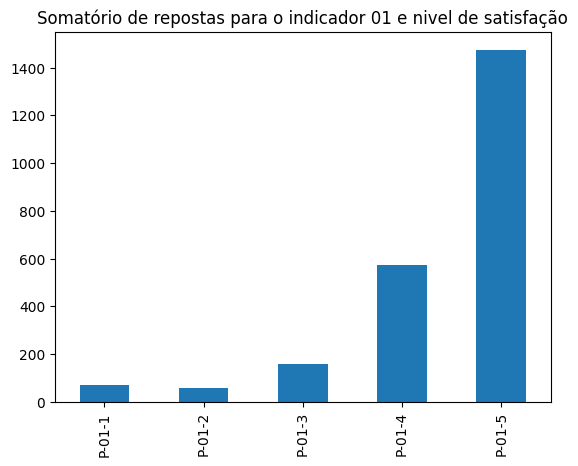

In [ ]:
# Calcula o somatório das respostas dadas para o indicador P-01-1 to P-01-5
p01_sums = df[indicator_columns['01']].sum()

# Cria um gráfico de barras por resposta
p01_sums.plot(kind='bar', title='Somatório de repostas para o indicador 01 e nivel de satisfação')

<Axes: xlabel='Satisfação', ylabel='Somatório'>

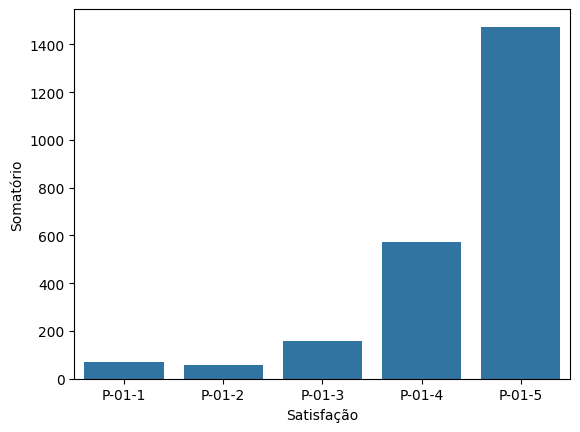

In [ ]:
# Calcula o somatório das respostas dadas para o indicador P-01-1 to P-01-5
p01_sums = df[indicator_columns['01']].sum()

# Redefinir índice para transformar a série em um DataFrame para seaborn
p01_sums_df = p01_sums.reset_index()

# Renomear as colunas
p01_sums_df.columns = ['Satisfação', 'Somatório']

# Cria um gráfico de barraas com a biblioteca seaborn
sns.barplot(data=p01_sums_df, x='Satisfação', y='Somatório')

O gráfico abaixo mostra agrupado por professor o nível de satisfação para o indicador 001 - O(A) professor(a) é assíduo, pontual e cumpre o horário de início e término das aulas.

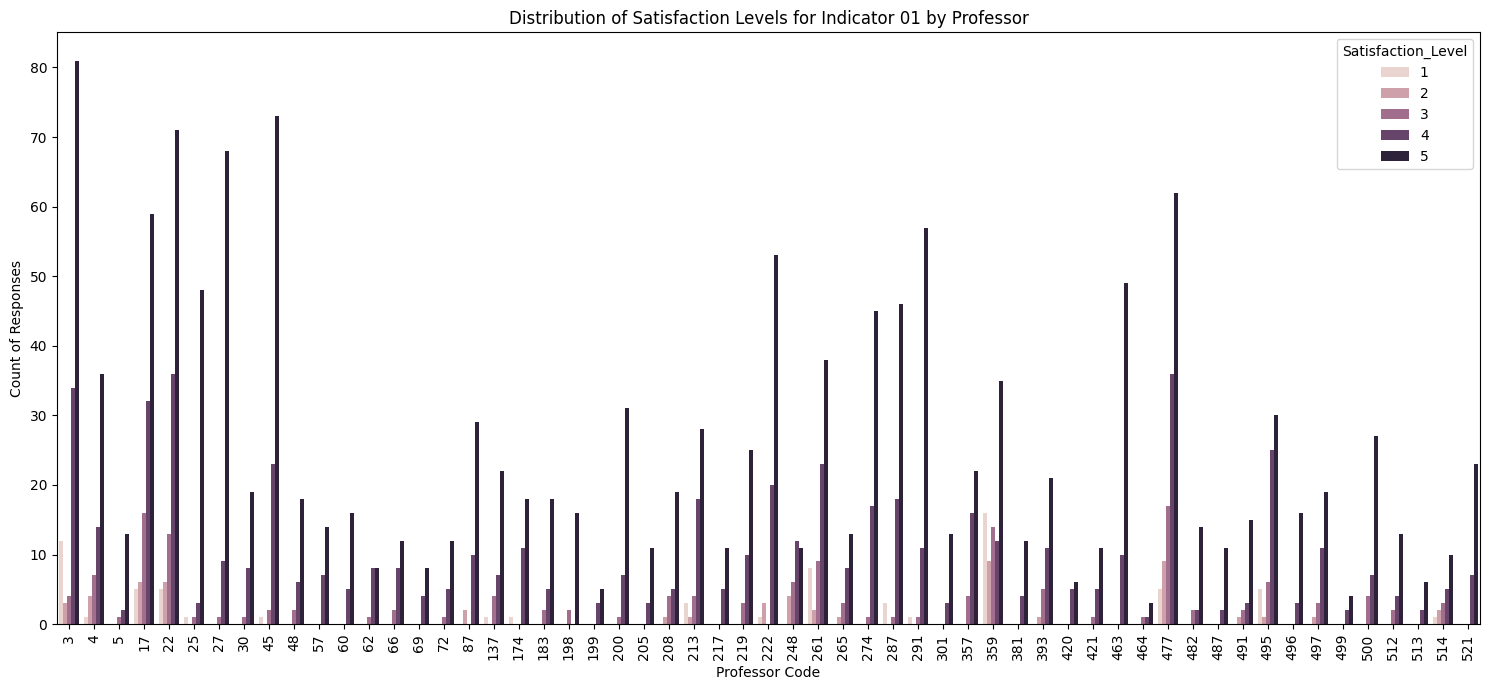

In [ ]:
# Selecione as colunas para o indicador '01' e o código do professor
df_p01 = df[['CODPROF'] + indicator_columns['01']]

# Converta o DataFrame em formato longo para facilitar a plotagem
df_p01_melted = df_p01.melt(id_vars='CODPROF',
                            value_vars=indicator_columns['01'],
                            var_name='Satisfaction_Level',
                            value_name='Count')

# Extraia o número do nível de satisfação dos nomes das colunas
df_p01_melted['Satisfaction_Level'] = df_p01_melted['Satisfaction_Level'].apply(lambda x: int(x.split('-')[-1]))

# Crie um gráfico de barras agrupadas usando o Seaborn
plt.figure(figsize=(15, 7)) # Adjust figure size for better readability
sns.barplot(data=df_p01_melted, x='CODPROF', y='Count', hue='Satisfaction_Level')
plt.title('Distribution of Satisfaction Levels for Indicator 01 by Professor')
plt.xlabel('Professor Code')
plt.ylabel('Count of Responses')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

O gráfico abaixo mostra os dados do professor=208 e o nível de satisfação para o indicador 001 - O(A) professor(a) é assíduo, pontual e cumpre o horário de início e término das aulas

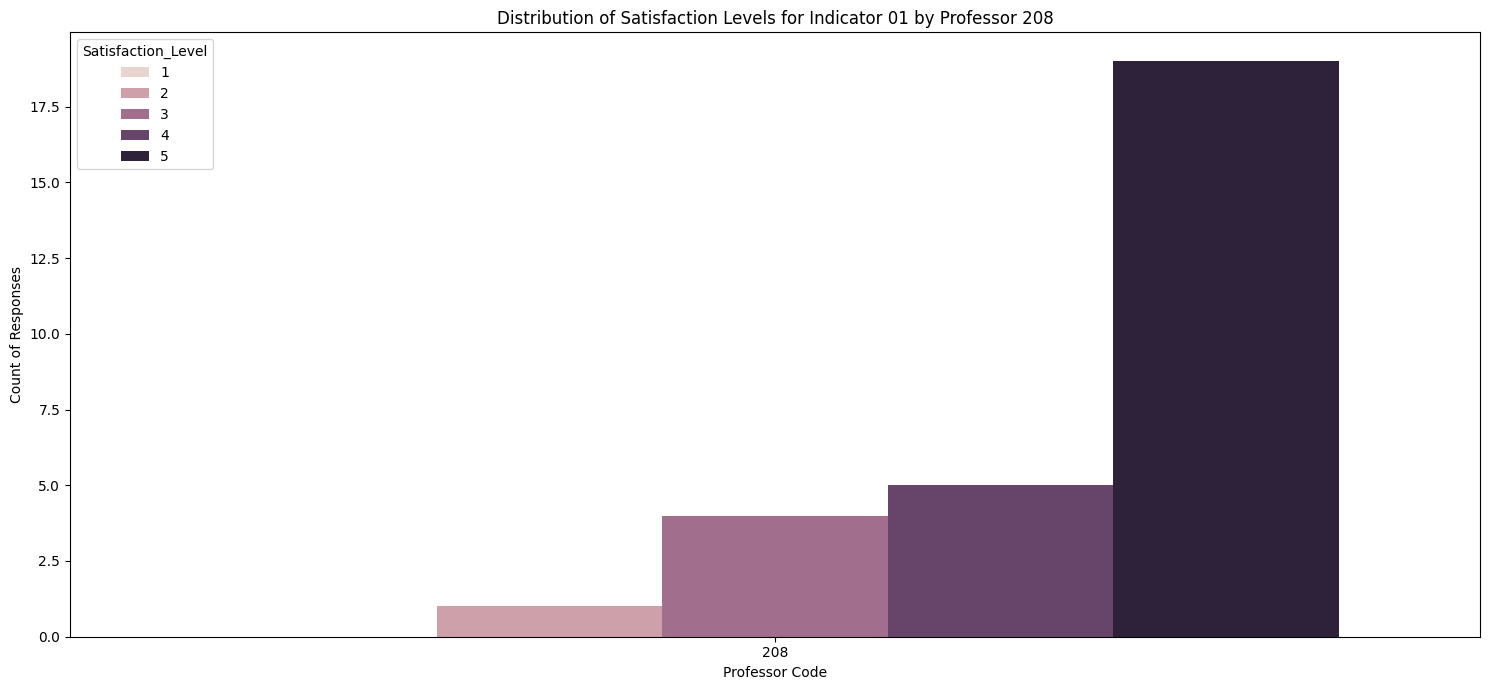

In [ ]:
# Filter the DataFrame to include only the row where CODPROF is 208
df_p01 = df[df['CODPROF'] == 208]

# Select the columns for indicator '01' and the professor code
df_p01 = df_p01[['CODPROF'] + indicator_columns['01']]


# Melt the DataFrame to long format for easier plotting
df_p01_melted = df_p01.melt(id_vars='CODPROF',
                            value_vars=indicator_columns['01'],
                            var_name='Satisfaction_Level',
                            value_name='Count')

# Extract the satisfaction level number from the column names
df_p01_melted['Satisfaction_Level'] = df_p01_melted['Satisfaction_Level'].apply(lambda x: int(x.split('-')[-1]))

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Create a grouped bar plot using seaborn
plt.figure(figsize=(15, 7)) # Adjust figure size for better readability
sns.barplot(data=df_p01_melted, x='CODPROF', y='Count', hue='Satisfaction_Level')
plt.title('Distribution of Satisfaction Levels for Indicator 01 by Professor 208')
plt.xlabel('Professor Code')
plt.ylabel('Count of Responses')
plt.xticks(rotation=0) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Calcular uma nota média para cada indicador de cada professor. Essa pode ser uma fórmula definida pela própria instituição. Aqui vou definir algo hipotético, só para fins de demonstração.
nota_final = media ponderada por cada indicador de acordo com o nível de avaliação = nota_final_01 = ('P-01-1*1' + 'P-01-2*2' + 'P-01-3*3' + 'P-01-4*4' +'P-01-5*5') / total de respostas

In [ ]:
# Create new columns for the calculated score for each indicator
for indicator, cols in indicator_columns.items():
    # Calculate the weighted sum for each professor for the current indicator
    weighted_sum = (df[cols[0]] * 1 +
                    df[cols[1]] * 2 +
                    df[cols[2]] * 3 +
                    df[cols[3]] * 4 +
                    df[cols[4]] * 5)

    # Calculate the total number of responses for the current indicator for each professor
    total_responses = df[cols].sum(axis=1)

    # Calculate the weighted average score, handling cases with zero responses
    df[f'SCORE-{indicator}'] = weighted_sum / total_responses
    df[f'SCORE-{indicator}'] = df[f'SCORE-{indicator}'].fillna(0) # Fill NaN with 0 for professors with no responses

# Display the DataFrame with the new score columns
display(df[['CODPROF'] + [f'SCORE-{i:02d}' for i in range(1, 15)]].head())

,CODPROF,SCORE-01,SCORE-02,SCORE-03,SCORE-04,SCORE-05,SCORE-06,SCORE-07,SCORE-08,SCORE-09,SCORE-10,SCORE-11,SCORE-12,SCORE-13,SCORE-14
0,3,4.261194,4.097015,3.940299,3.910448,4.014925,4.149254,3.970149,4.067164,4.000000,3.835821,4.149254,3.955224,4.074627,4.104478
1,4,4.290323,4.596774,4.532258,4.596774,4.677419,4.629032,4.564516,4.564516,4.548387,4.516129,4.629032,4.629032,4.596774,4.580645
2,5,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.687500
3,17,4.135593,4.245763,4.389831,4.330508,4.389831,4.279661,4.305085,4.279661,4.177966,4.271186,4.245763,4.313559,4.271186,4.355932
4,22,4.236641,4.419847,4.061069,4.190840,4.244275,4.358779,4.183206,4.129771,4.175573,4.015267,4.305344,4.167939,4.137405,4.213740


In [ ]:
dfScore = df[['CODPROF'] + [f'SCORE-{i:02d}' for i in range(1, 15)]]
dfScore.to_csv(PATH+'CPA-2024-01-DADOS-SCORE.csv', index=False)

In [ ]:
dfScore = pd.read_csv(PATH+'CPA-2024-01-DADOS-SCORE.csv')
dfScore.head()

,CODPROF,SCORE-01,SCORE-02,SCORE-03,SCORE-04,SCORE-05,SCORE-06,SCORE-07,SCORE-08,SCORE-09,SCORE-10,SCORE-11,SCORE-12,SCORE-13,SCORE-14
0,3,4.261194,4.097015,3.940299,3.910448,4.014925,4.149254,3.970149,4.067164,4.000000,3.835821,4.149254,3.955224,4.074627,4.104478
1,4,4.290323,4.596774,4.532258,4.596774,4.677419,4.629032,4.564516,4.564516,4.548387,4.516129,4.629032,4.629032,4.596774,4.580645
2,5,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.687500
3,17,4.135593,4.245763,4.389831,4.330508,4.389831,4.279661,4.305085,4.279661,4.177966,4.271186,4.245763,4.313559,4.271186,4.355932
4,22,4.236641,4.419847,4.061069,4.190840,4.244275,4.358779,4.183206,4.129771,4.175573,4.015267,4.305344,4.167939,4.137405,4.213740


Com o dataset com o ScoreMedio é possível fazer outros gráficos e analisar os dados sobre outra ótica.

In [ ]:
# Calculate the average score across all indicators for each professor
dfScore['AVERAGE_SCORE'] = dfScore.filter(like='SCORE').mean(axis=1)

# Display the DataFrame with the new average score column
display(dfScore[['CODPROF', 'AVERAGE_SCORE']].head())

,CODPROF,AVERAGE_SCORE
0,3,4.037846
1,4,4.567972
2,5,4.745536
3,17,4.285109
4,22,4.202835


Alguns exemplos de gráficos que podem ser gerados com essa transformação de dados.

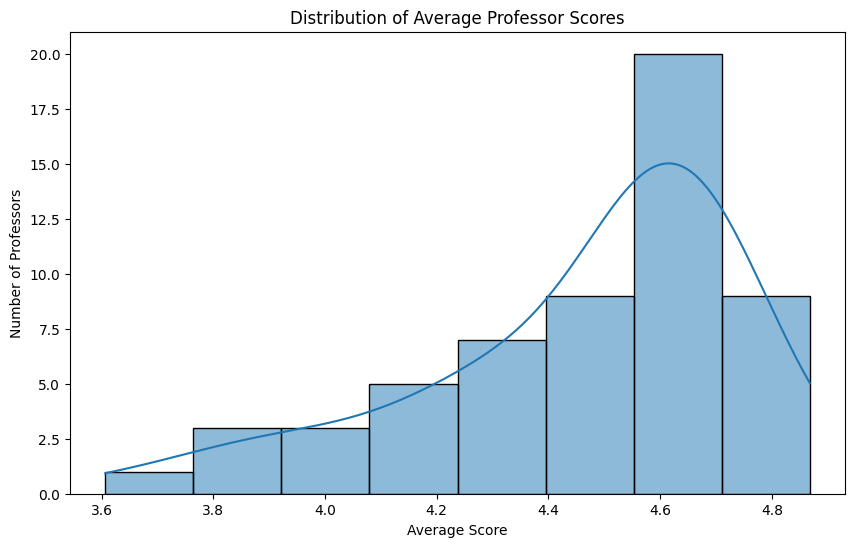

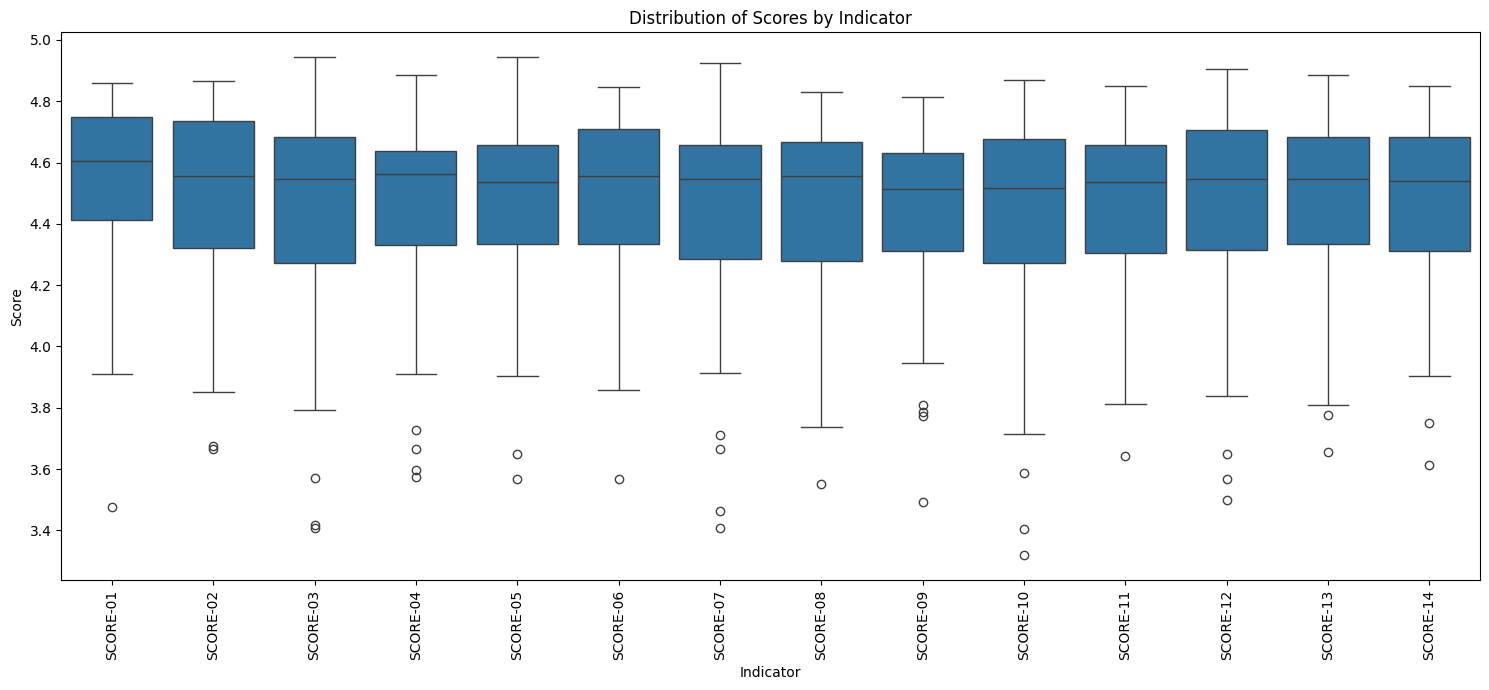

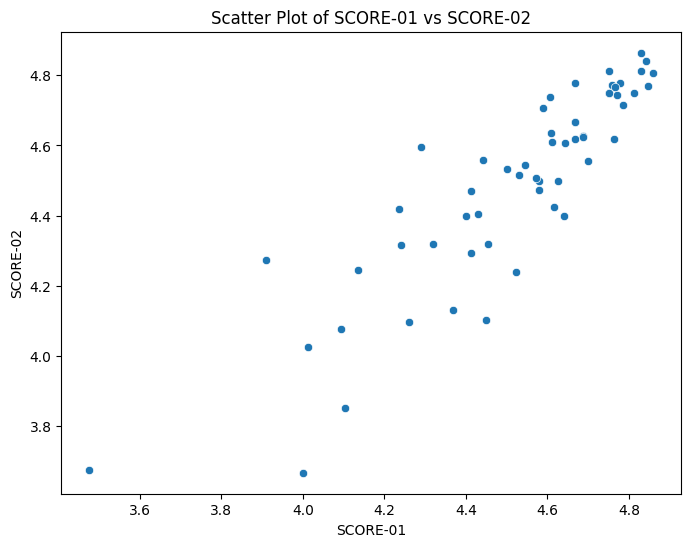

In [ ]:
# 1. Histogram of Average Scores
plt.figure(figsize=(10, 6))
sns.histplot(data=dfScore, x='AVERAGE_SCORE', kde=True)
plt.title('Distribution of Average Professor Scores')
plt.xlabel('Average Score')
plt.ylabel('Number of Professors')
plt.show()

# 2. Box Plot of Scores by Indicator
# Melt the dfScore DataFrame to long format for easier plotting
dfScore_melted = dfScore.melt(id_vars='CODPROF',
                              value_vars=[f'SCORE-{i:02d}' for i in range(1, 15)],
                              var_name='Indicator',
                              value_name='Score')

plt.figure(figsize=(15, 7))
sns.boxplot(data=dfScore_melted, x='Indicator', y='Score')
plt.title('Distribution of Scores by Indicator')
plt.xlabel('Indicator')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Scatter Plot of Two Indicator Scores (Example: SCORE-01 vs SCORE-02)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dfScore, x='SCORE-01', y='SCORE-02')
plt.title('Scatter Plot of SCORE-01 vs SCORE-02')
plt.xlabel('SCORE-01')
plt.ylabel('SCORE-02')
plt.show()

Pronto! Agora você tem um dataset com os dados de um score calculado em cima de cada indicador avaliado, para executar análises mais profundas com machine learning. Atenção, essa é a penas uma possiblidade de conduzir as suas análises.